# Variable Definition Key

perished Survival 0 = No, 1 = Yes

pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex Sex

Age Age in years

sibsp # of siblings / spouses aboard the Titanic

parch # of parents / children aboard the Titanic

ticket Ticket number

fare Passenger fare

cabin Cabin number

embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# Variable Notes

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, 
stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, 
son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import os
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport

In [2]:
def read_csv(file: str) -> pd.DataFrame:
    df = pd.read_csv(os.path.join(os.getcwd(), f"dataset/{file}"))
    return df

In [3]:
def get_subset(df: pd.DataFrame, column: str, value: str) -> pd.DataFrame:
    return df[df[column] == value]

In [4]:
titanic = read_csv("train.csv")
titanic_copy = titanic.copy() # Make a copy of the dataset to manipulate

In [5]:
titanic_copy.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
titanic_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# PassengerId, Cabin and Ticket cannot tell us much.
titanic_copy = titanic_copy.drop(["PassengerId", "Ticket", "Cabin"], axis=1)
titanic_copy.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'], dtype=object)

In [8]:
titanic_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [9]:
titanic_survived = get_subset(titanic_copy, "Survived", 1)
titanic_not_survived = get_subset(titanic_copy, "Survived", 0)

In [10]:
titanic_survived["Age"].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
average_survived_age, std_survived_age = titanic_survived["Age"].mean(), titanic_survived["Age"].std()
median_survival_age = titanic_survived["Age"].median()

print(f"Survival Age -> {average_survived_age} +/- {std_survived_age} with a median value of {median_survival_age}")

Survival Age -> 28.343689655172415 +/- 14.950951984140428 with a median value of 28.0


<AxesSubplot:>

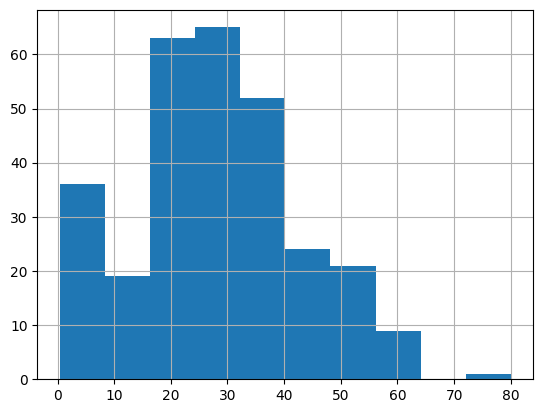

In [12]:
titanic_survived["Age"].hist()

In [13]:
titanic_survived["Fare"].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
average_survived_fare, std_survived_fare = titanic_survived["Fare"].mean(), titanic_survived["Fare"].std()
median_survival_fare = titanic_survived["Fare"].median()

print(f"Survival's fare -> {average_survived_fare} +/- {std_survived_fare} with a median value of {median_survival_fare}")

Survival's fare -> 48.39540760233918 +/- 66.59699811829475 with a median value of 26.0


<AxesSubplot:>

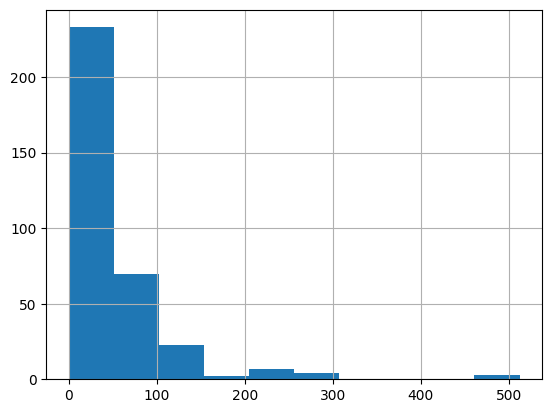

In [15]:
titanic_survived["Fare"].hist()

In [16]:
sex_survival_mode = titanic_survived["Sex"].mode().tolist()[0]
pclass_survival_mode = titanic_survived["Pclass"].mode().tolist()[0]
parch_survival_mode = titanic_survived["Parch"].mode().tolist()[0]
sibling_survival_mode = titanic_survived["SibSp"].mode().tolist()[0]

embark_zones = {"C": "Chebourg", "S": "Southampton", "Q": "Queenstown"}
classes = {1: "First", 2: "Second", 3: "Third"}

print(f"The gender that survived the most -> {sex_survival_mode}")
print(f"Class with most survivors -> {classes[pclass_survival_mode]} Class")
print(f"Most survivors had {sibling_survival_mode} Siblings per Spouse")
print(f"Most Adults who survided had {parch_survival_mode} Children per Parent")



The gender that survived the most -> female
Class with most survivors -> First Class
Most survivors had 0 Siblings per Spouse
Most Adults who survided had 0 Children per Parent


In [17]:
wm_titanic = titanic_copy[titanic_copy["Sex"] == "female"]
wm_titanic_survived = titanic_survived[titanic_survived["Sex"] == "female"]

embarked_survival_mode = wm_titanic_survived["Embarked"].mode().tolist()[0]

survived_num_chebourg = wm_titanic_survived['Embarked'].value_counts()["C"]
survived_num_southampton = wm_titanic_survived['Embarked'].value_counts()["S"]
survived_num_queenstown = wm_titanic_survived['Embarked'].value_counts()["Q"]

wm_num_chebourg = wm_titanic['Embarked'].value_counts()["C"]
wm_num_southampton = wm_titanic['Embarked'].value_counts()["S"]
wm_num_queenstown = wm_titanic['Embarked'].value_counts()["Q"]

print("Number of women who embarked at each port (Cherbourg, Southampton, Queenstown)")
print(f"Cherbourg: {wm_num_chebourg}")
print(f"Southampton: {wm_num_southampton}")
print(f"Queenstown: {wm_num_queenstown}")

print("--------------------------------------------------------------------------------------")

print("Percent of survivors by Port of Embarkment (Cherbourg, Southampton, Queenstown): ")
print(f"Cherbourg: {survived_num_chebourg/wm_num_chebourg: .3f}")
print(f"Southampton: {survived_num_southampton/wm_num_southampton: .3f}")
print(f"Queenstown: {survived_num_queenstown/wm_num_queenstown: .3f}")

print("--------------------------------------------------------------------------------------")

print(f"Most survivors embarked at -> {embark_zones[embarked_survival_mode]}")

Number of women who embarked at each port (Cherbourg, Southampton, Queenstown)
Cherbourg: 73
Southampton: 203
Queenstown: 36
--------------------------------------------------------------------------------------
Percent of survivors by Port of Embarkment (Cherbourg, Southampton, Queenstown): 
Cherbourg:  0.877
Southampton:  0.690
Queenstown:  0.750
--------------------------------------------------------------------------------------
Most survivors embarked at -> Southampton


In [18]:
wm_survived_age, std_wm_survived_age = wm_titanic["Age"].mean(), wm_titanic["Age"].std()
median_wm_survival_age = wm_titanic["Age"].median()

print(f"Women's survival age -> {wm_survived_age} +/- {std_wm_survived_age} with a median value of {median_wm_survival_age}")

Women's survival age -> 27.915708812260537 +/- 14.110146457544129 with a median value of 27.0


Insights
1. If you were a women between the ages of 13 - 43, having a 1st class ticket, no children or siblings. You were more likely to survive.
2. Passengers embarking at Cherbourg 97.7% survival rate, followed by Queenstown at 75% and 69% at Southampton.

In [19]:
titanic_not_survived.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [20]:
titanic_not_survived["Age"].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [21]:
average_perished_age, std_perished_age = titanic_not_survived["Age"].mean(), titanic_not_survived["Age"].std()
median_perished_age = titanic_not_survived["Age"].median()

print(f"Average age of those who perished -> {average_perished_age} +/- {std_perished_age} with a median value of {median_perished_age}")

Average age of those who perished -> 30.62617924528302 +/- 14.172109877138492 with a median value of 28.0


<AxesSubplot:>

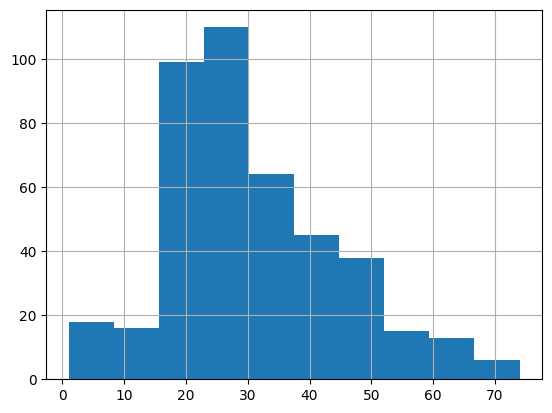

In [22]:
titanic_not_survived["Age"].hist()

In [23]:
titanic_not_survived["Fare"].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [24]:
average_perished_fare, std_perished_fare = titanic_not_survived["Fare"].mean(), titanic_not_survived["Fare"].std()
median_perished_fare = titanic_not_survived["Fare"].median()

print(f"Average fare of those who perished -> {average_perished_fare} +/- {std_perished_fare} with a median value of {median_perished_fare}")

Average fare of those who perished -> 22.117886885245902 +/- 31.38820653056397 with a median value of 10.5


In [25]:
sex_perished_mode = titanic_not_survived["Sex"].mode().tolist()[0]
pclass_perished_mode = titanic_not_survived["Pclass"].mode().tolist()[0]
parch_perished_mode = titanic_not_survived["Parch"].mode().tolist()[0]
sibling_perished_mode = titanic_not_survived["SibSp"].mode().tolist()[0]


print(f"The gender that Perished the most -> {sex_perished_mode}")
print(f"Class with most Perished -> {classes[pclass_perished_mode]} Class")
print(f"Most people who perished had {sibling_perished_mode} Siblings per Spouse")
print(f"Most people who perished had {parch_perished_mode} Children per Parent")

The gender that Perished the most -> male
Class with most Perished -> Third Class
Most people who perished had 0 Siblings per Spouse
Most people who perished had 0 Children per Parent


In [26]:
men_titanic = titanic_copy[titanic_copy["Sex"] == "male"]
men_titanic_perished = titanic_not_survived[titanic_not_survived["Sex"] == "male"]

embarked_perished_mode = titanic_not_survived["Embarked"].mode().tolist()[0]

perished_num_chebourg = men_titanic_perished['Embarked'].value_counts()["C"]
perished_num_southampton = men_titanic_perished['Embarked'].value_counts()["S"]
perished_num_queenstown = men_titanic_perished['Embarked'].value_counts()["Q"]

men_num_chebourg = men_titanic['Embarked'].value_counts()["C"]
men_num_southampton = men_titanic['Embarked'].value_counts()["S"]
men_num_queenstown = men_titanic['Embarked'].value_counts()["Q"]

print("Number of women who embarked at each port (Cherbourg, Southampton, Queenstown)")
print(f"Cherbourg: {men_num_chebourg}")
print(f"Southampton: {men_num_southampton}")
print(f"Queenstown: {men_num_queenstown}")

print("--------------------------------------------------------------------------------------")

print("Percent of survivors by Port of Embarkment (Cherbourg, Southampton, Queenstown): ")
print(f"Cherbourg: {perished_num_chebourg/men_num_chebourg: .3f}")
print(f"Southampton: {perished_num_southampton/men_num_southampton: .3f}")
print(f"Queenstown: {perished_num_queenstown/men_num_queenstown: .3f}")

print("--------------------------------------------------------------------------------------")

print(f"Most survivors embarked at -> {embark_zones[embarked_perished_mode]}")

Number of women who embarked at each port (Cherbourg, Southampton, Queenstown)
Cherbourg: 95
Southampton: 441
Queenstown: 41
--------------------------------------------------------------------------------------
Percent of survivors by Port of Embarkment (Cherbourg, Southampton, Queenstown): 
Cherbourg:  0.695
Southampton:  0.825
Queenstown:  0.927
--------------------------------------------------------------------------------------
Most survivors embarked at -> Southampton


Insights
1. If you were a man between the ages of 15 - 45, having a 3rd class ticket, no children or siblings. You were more likely to have perished.
2. Passengers embarking at Cherbourg 92.7% non-survival rate, followed by Southampton at 82.5% and 69.5% at Cherbourg.

Insights
- If you identified as male and were above the age of 15, you were more likely to perish. On the other hand, if you identified as female, you were more likely to survive.

In [27]:
! pip install seaborn

In [28]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

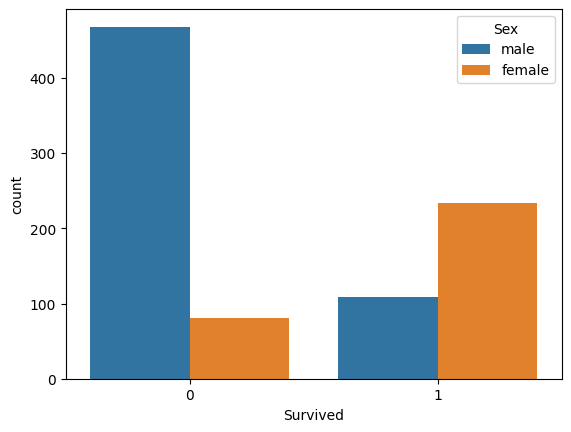

In [29]:
# Num.of survivors
sns.countplot(x='Survived', data=titanic_copy, hue='Sex')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

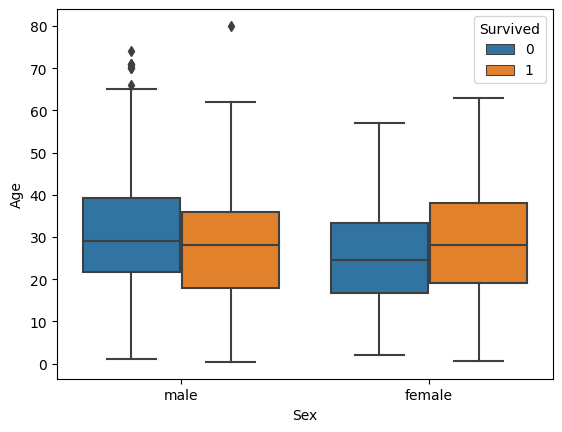

In [30]:
# Male vs Female survivors
sns.boxplot(x='Sex', y='Age', hue='Survived', data=titanic_copy)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

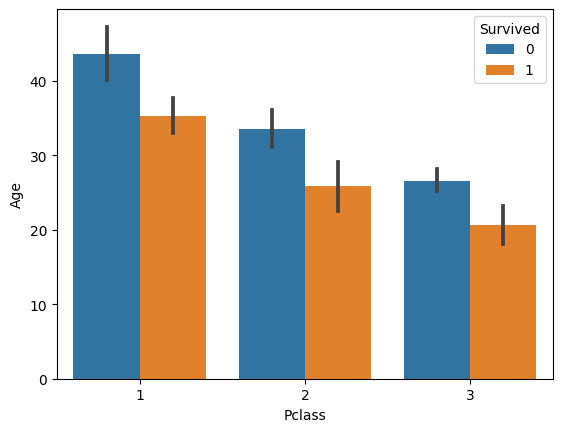

In [31]:
# Survivors by class
sns.barplot(x='Pclass', y='Age', hue='Survived', data=titanic_copy)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

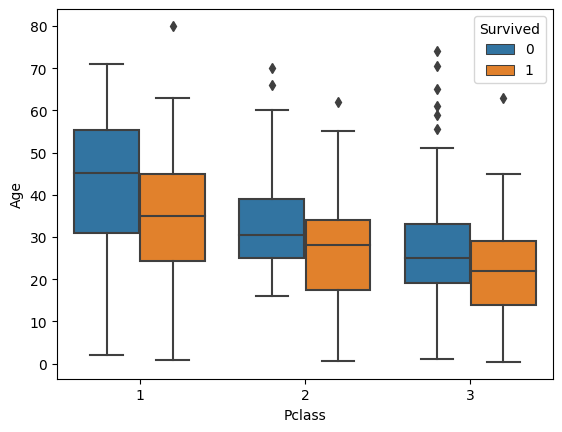

In [32]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic_copy)

<AxesSubplot:>

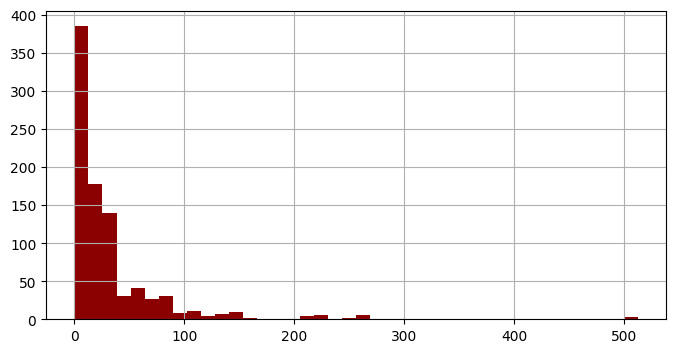

In [37]:
# Survival by fare paid
titanic_copy['Fare'].hist(color='darkred',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

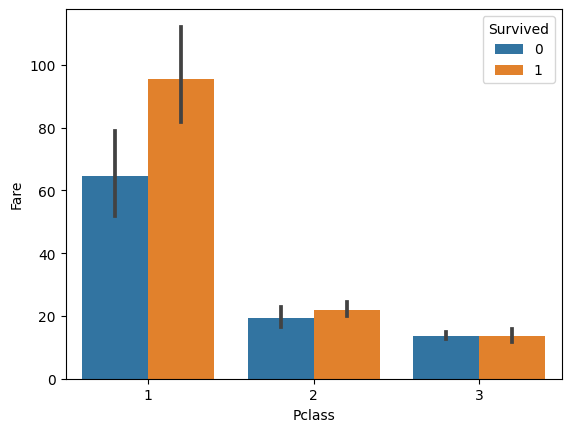

In [38]:
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=titanic_copy)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

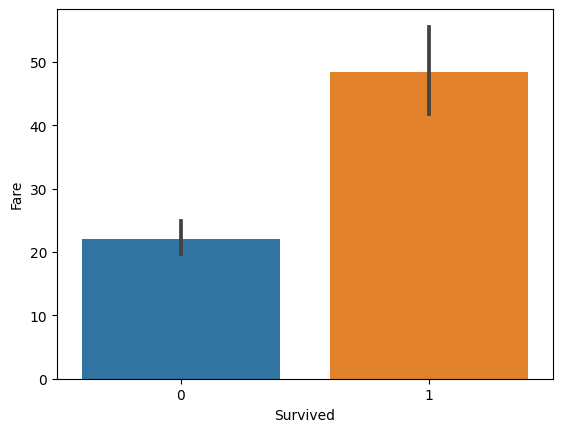

In [36]:
sns.barplot(x='Survived', y='Fare', data=titanic_copy)

In [34]:
# This is pretty high for titanic times...
titanic_copy.nlargest(10, 'Fare')

# I guess those fares were probably paid by very rich people for luxury cabins and such

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,S
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,262.3750,C
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,262.3750,C
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,247.5208,C
